<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Generalization Error</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.14</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this exercise, we will use a slightly bigger dataset with 21613 observations (called the "KC-HouseSale" dataset in the Ebook). This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Using this dataset, we will play again the same game that we did in the case of simple linear regression (see Lab Exercise 2.7 Sampling Error). Namely, we refer to the KC-HouseSale dataset as representing the whole population (namely, all the houses of a town) and take a small random sample from it (for example, having 500 observations). This small random sample will represent the actual dataset that you have in hand. Thus, by running Monte Carlo simulations, we will have a better understanding of the:
- bias and variance vs. model complexity
- training error and testing error vs. model complexity
- training error and testing error vs. test set ratio
- difference between training error and testing error due to sampling error
- difference between training and testing error concerning generalization error
- difference between different testing methods.
- model assesment and model selection

**Note**: *It is highly recommended to read the appropriate chapter from the Ebook before going through this exercise. The original dataset can be downloaded from Kaggle at https://www.kaggle.com/harlfoxem/housesalesprediction. 

### Table of contents
1. [Reading the data](#ReadingData)
2. [Exploratory Data Analysis](#EDA)
3. [Fitting a multiple linear regression model](#FitMLR)
4. [Bias and variance vs. model complexity](#BiasVariance)
5. [Estimating generalization error with test error](#GenError)
6. [Transforming the target variable](#TargetTransf)
7. [Model assesment of the fitted linear model ](#Validation)

## 1. Reading the data <a name="ReadingData"></a>

As a first step, we import all the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from statsmodels.formula.api import ols
import seaborn as sns
import os
%matplotlib inline

Next, read the HouseSalesKingCounty.csv file into a pandas dataframe, and print out the number of observations, respective the number of features. Next, list the type of features as stored by pandas and the first five rows of the dataset.

In [2]:
data = pd.read_csv(os.path.join('data','HouseSalesKingCounty.csv'))
Np,Dp=data.shape
print("Number of total observations =",Np)
print("Number of total input variables =",Dp)
print()
print(data.info())
data.head()

Number of total observations = 21613
Number of total input variables = 21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Columns of the dataset:

- **id** - A unique ID for each house sold
- **date** - The date of the home sale
- **price** - Price of each home sold (is the prediction target)
- **bedrooms** - Number of bedrooms per house
- **bathrooms** - Number of bathrooms per house (where 0.5 accounts for a room with a toilet but no shower)
- **sqft_living** - Square footage of the apartment interior living space
- **sqft_lot** - Square footage of the land space
- **floors** - Number of floors (levels) in the house
- **waterfront** - A binary variable for whether the house has a view to a waterfront or not
- **view** - An index from 0 to 4 of how good the view of the property was
- **condition** - An index from 1 to 5 on the condition of the apartment (the higher, the better)
- **grade** - Overall grade is given to the housing unit, based on King County grading system (the higher, the better) 
- **sqft_above** - Square footage of house apart from the basement (above ground level)
- **sqft_basement** - Square footage of the basement (below ground level)
- **yr_built** - The year the house was initially built
- **yr_renovated** - The year of the house's last renovation
- **zipcode** - What zip code area the house is in
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space of the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

There are several predictors in the dataset. We need to explore the data first.

## 2. Exploratory Data Analysis <a name="EDA"></a>

### Checking for missing values

First check for any missing value.

In [3]:
print(data.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


No missing value is found. 

Let's list the descriptive statistics for each variable.

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### ID and Date

The ID is used only for identifying the house in the dataset, and it should not have any relation with the target price. We can check the correlation coefficient to ensure us about this.

In [5]:
data[['id','price']].corr()

,id,price
id,1.000000,-0.016762
price,-0.016762,1.000000


And indeed, the ID is not correlated with the price. So we can omit this input variable. <br>

The dataset contains houses sold in one year. We can check this if we convert the column to pandas DateTime format and print out the minimum and maximum values.

In [6]:
data['date']=pd.to_datetime(data['date'])
print("Start date:",data['date'].min())
print("End date:",data['date'].max())

Start date: 2014-05-02 00:00:00
End date: 2015-05-27 00:00:00


Let's create the plot of the average house prices for each day and make a time series over this one year. Also, create the horizontal line of the average price for all the houses found in the dataset for reference.

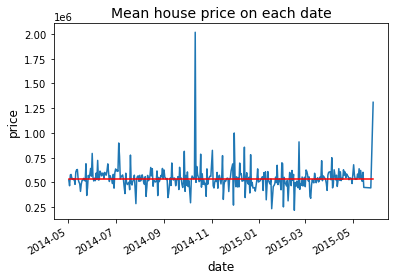

In [7]:
data.groupby(data['date'])['price'].mean().plot()
plt.plot([data['date'].min(),data['date'].max()],[data['price'].mean(),data['price'].mean()],'r')
plt.xlabel('date',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Mean house price on each date',fontsize=14)
plt.show()

We can observe there is no price increase over this period of one year in the average price. Thus, there is no need to take inflation into account (there is no increasing trend in the time series).<br>
However, we can observe a high spike of mean price in the middle. Let's check it.

In [8]:
data[data['date']==data.groupby(data['date'])['price'].mean().idxmax()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17296,4047200825,2014-10-11,400000,1,1.0,1390,60984,1.0,0,0,...,6,1390,0,1960,0,98019,47.7652,-121.903,1620,24225
19148,3625049042,2014-10-11,3635000,5,6.0,5490,19897,2.0,0,0,...,12,5490,0,2005,0,98039,47.6165,-122.236,2910,17600


On that particular day, two houses were sold, but one with a price below the average. The other has a maximum selling price. However, this should not be seen as an outlier as the house has four bedrooms and six bathrooms (both well above the average), the overall living area is 5500 sqft with a land of ~20000 sqft (both well above the average), and very high grade (almost maximum).

Let's check if there is any seasonal effect on the average price. For this purpose, let's create a plot of the average price over each month.

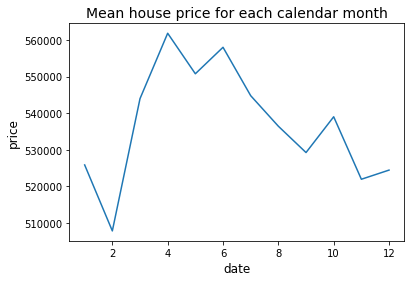

In [9]:
data.groupby(data.date.dt.month)['price'].mean().plot()
plt.xlabel('date',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Mean house price for each calendar month',fontsize=14)
plt.show()

We can observe some minor seasonal effects, as higher average prices are seen during March-July compared to the rest of the year. Let's create a binary variable by binarizing the date variable such that it would have a value of 1 during March-July and zero otherwise. Let's see the correlation between house price and this new variable, called "spring_summer".

In [10]:
data['spring_summer']=data.date.dt.month.apply(lambda x: 1 if x in [3,4,5,6,7] else 0)
print(data[['spring_summer','price']].corr('pearson'))
print(data[['spring_summer','price']].corr('spearman'))

               spring_summer     price
spring_summer       1.000000  0.033033
price               0.033033  1.000000
               spring_summer     price
spring_summer       1.000000  0.048706
price               0.048706  1.000000


The correlation coefficient both for Pearson and Spearman is very-very small (only 0.033 respective 0.048). So the seasonal effect is not relevant. 

### Categorical variables

In a previous lab exercise - **Lab Exercise 3.8 Discretization** - we already transformed the 'yr_renovated' numerical variable into a binary variable. We should also create a new numerical variable called "age" from the "yr_built". That would be helpful when standardizing the data, as we will see later on.

In [11]:
data['renovated']=data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
data['age']=2017-data['yr_built']

In a previous lab exercise - **Lab Exercise 3.7 Encoding Categorical Features** - we already investigated the correlation between categorical features, respective the correlation with the target.

Here we just create a box plot for each categorical variable.

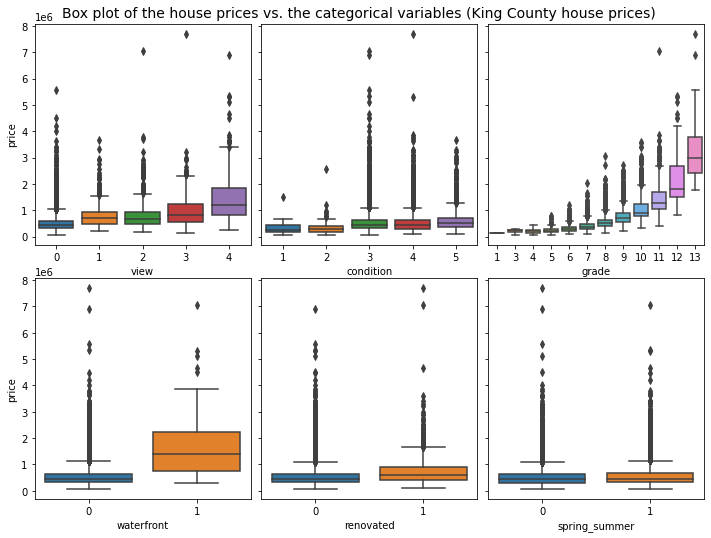

In [12]:
fig, ax = plt.subplots(2,3, figsize=(12,8),sharey=True)
fig.subplots_adjust(hspace=0.15,wspace=0.05)
sns.boxplot(x="view", y="price", data=data,ax=ax[0,0])
sns.boxplot(x="condition", y="price", data=data,ax=ax[0,1])
ax[0,1].set(ylabel=None)
sns.boxplot(x="grade", y="price", data=data,ax=ax[0,2])
ax[0,2].set(ylabel=None)
sns.boxplot(x="waterfront", y="price", data=data,ax=ax[1,0])
sns.boxplot(x="renovated", y="price", data=data,ax=ax[1,1])
ax[1,1].set(ylabel=None)
sns.boxplot(x="spring_summer", y="price", data=data,ax=ax[1,2])
ax[1,2].set(ylabel=None)
fig.suptitle("Box plot of the house prices vs. the categorical variables (King County house prices)",fontsize=14)
fig.subplots_adjust(top=0.95)
plt.show()

As can be seen 
- price increases with the "view" (slightly exponentially for higher values),
- price increases with "condition" (higher price is associated with condition 3,4,5) - but the price difference is not so significant,
- price increases exponentially with "grade",
- price is much higher with "waterfront",
- price is slightly higher for renovated houses,
- price is almost the same for sales during spring and summer compared to sales during autumn and winter.

Let's define the eta correlation ratio function:

In [13]:
def eta2(categorical, numerical):
    cat_enc, _ = pd.factorize(categorical) # make sure that categorical variables are encoded
    num_cat=np.max(cat_enc)+1
    yc_avg=np.zeros(num_cat)
    Nc=np.zeros(num_cat)  
    for c in range(num_cat):
        yc_obs=numerical[np.argwhere(cat_enc == c).flatten()]
        yc_avg[c]=np.mean(yc_obs) # Calculate the mean of the observations for a given categorical value
        Nc[c]=len(yc_obs)         # Calculate the number of observations for a given categorical value
    y_avg=np.sum(Nc*yc_avg)/np.sum(Nc) # Calculate the overall mean
    return np.sum(Nc*(yc_avg-y_avg)**2)/np.sum((numerical-y_avg)**2) # Calculate eta according to the formula from the book

And print out the eta correlation ratio between the target and the categorical variables.

In [14]:
print("Eta correlation between price and")
print('view:',np.sqrt(eta2(data['view'],data['price'])))
print('condition:',np.sqrt(eta2(data['condition'],data['price'])))
print('grade:',np.sqrt(eta2(data['grade'],data['price'])))
print('waterfront:',np.sqrt(eta2(data['waterfront'],data['price'])))
print('renovated:',np.sqrt(eta2(data['renovated'],data['price'])))
print('spring_summer:',np.sqrt(eta2(data['spring_summer'],data['price'])))

Eta correlation between price and
view: 0.4101748007755014
condition: 0.0829328979459151
grade: 0.7208991698893609
waterfront: 0.26636943437082033
renovated: 0.12609226343484364
spring_summer: 0.03303288296446679


As can be seen, only the following categorical variables have some correlation with the target:
- view
- grade
- waterfront (low correlation)

Let's also check whether there is any correlation between the categorical (ordinal) variables.

In [15]:
catvar_list=['view','condition','grade','waterfront','renovated','spring_summer']
data[catvar_list].corr('spearman')

,view,condition,grade,waterfront,renovated,spring_summer
view,1.000000,0.046000,0.217044,0.284924,0.097216,0.000178
condition,0.046000,1.000000,-0.167374,0.016744,-0.064585,0.001987
grade,0.217044,-0.167374,1.000000,0.062189,0.014925,0.017783
waterfront,0.284924,0.016744,0.062189,1.000000,0.093294,-0.003517
renovated,0.097216,-0.064585,0.014925,0.093294,1.000000,0.005785
spring_summer,0.000178,0.001987,0.017783,-0.003517,0.005785,1.000000


### Numerical variables

In what follows, the numerical variables will be examined.

#### Target price

First, check the target price distribution. Let's use the histogram with 100 bins to have a good approximation of the distribution. We can also make a boxplot to have the first glimpse if there are any outlier values.

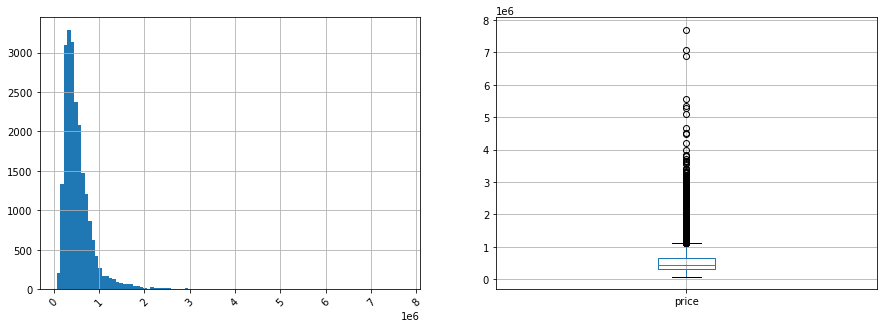

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
data['price'].hist(bins=100,ax=ax[0])
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
data[['price']].boxplot(ax=ax[1])
plt.show()

We can observe that the distribution is unimodal (only one peak) but not symmetric. It has a skew toward lower price and has a long tail toward higher price. The boxplot shows several outlier values. Let's have a look only for the most upper values (setting a limit of >4,000,000). For a better overview, we will not print out the first two and last five columns.

In [17]:
data[data['price']>4000000].drop(['id','date','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,spring_summer,renovated,age
1164,5110800,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,0,0,18
1315,5300000,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,1,0,26
1448,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,1,0,8
2626,4500000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,0,0,13
3914,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,1,1,77
4411,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,0,0,16
7252,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,0,1,107
8092,4668000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,1,1,34
8638,4489000,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,1,0,16
9254,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,0,0,16


Next, create the box plot for the number of bathrooms and number of bedrooms.

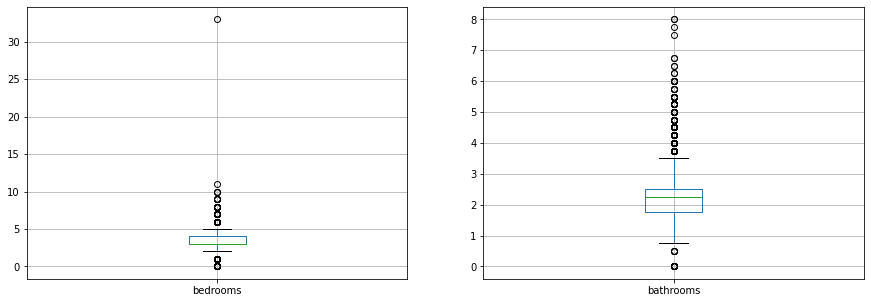

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
data[['bedrooms']].boxplot(ax=ax[0])
data[['bathrooms']].boxplot(ax=ax[1])
plt.show()

As can be seen, there is one observation with more than 30 bedrooms, which is well above the rest of the observations. Let's check this observation more rigorously.

In [19]:
(data[data['bedrooms']>30]).drop(['id','date','lat','long','zipcode','yr_renovated'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,spring_summer,renovated,age
15870,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,1330,4700,1,0,70


It shall be noticed that the price of the observation with 33 bedrooms has
- a price at around the third quantile (75% is at 645000)
- number of bathrooms is at first quantile (25% is at 1.75)
- sqft living is between first and second quantile
- sqft lot is between first and second quantile 
- sqft above is lower than the first quantile
- sqft basement is at third quantile
- although the house does not have waterfront and the view is not good (it got the lowest value), the condition is maximum, and the grade has the median value

Based on this data, we might suspect that human error occurred, and the number of bedrooms is much smaller. It can be that someone just erroneously typed in 33 instead of 3 for the number of bedrooms (number 3 is the median value for bedrooms, so it is like using imputation with the median value for a missing value).

Now, let's see the number of bathrooms. We are focusing only on the top values that are greater than seven.

In [20]:
(data[data['bathrooms']>7]).drop(['id','date','lat','long','zipcode','yr_renovated'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,spring_summer,renovated,age
7252,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,3940,8800,0,1,107
8546,450000,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,1448,3866,0,0,21
9254,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,4540,42730,0,0,16
12777,2280000,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,4850,217800,1,0,18


As can be seen, out of the four, three have the maximum grade and have more than one floor. Moreover, the number of bedrooms is also in the maximum regions. So we should not consider these values as outliers.

One strange observation we might have, though. There is at least one house that does not have a bathroom at al. Let's check this.

In [21]:
(data[data['bathrooms']==0]).drop(['id','date','lat','long','zipcode','yr_renovated'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,spring_summer,renovated,age
875,1095000,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,2360,4000,1,0,27
1149,75000,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,1160,42882,0,0,51
3119,380000,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,1470,1399,0,0,11
5832,280000,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,990,22549,0,0,67
6994,1295648,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,4740,35061,1,0,27
9773,355000,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,2520,8050,1,0,27
9854,235000,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,1060,7200,0,0,21
10481,484000,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,1690,19290,0,0,69
14423,139950,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,1380,9600,1,0,104
19452,142000,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,1620,22850,0,0,54


There are ten such houses. We can make the following observations:
- the price is below the first quantile for five out of ten houses (in fact, one house has the minimum price); those that have a higher price are associated with much higher sqft living or lot
- the number of bedrooms is also zero (for three out of ten there is one bedroom)
- the sqft living is either below or around the first quantile (exception is observation indexed with 875, 6994, and 9773)
- the sqft lot is below the first quantile
- the sqft above is below or slightly above the first quantile (exception is observation indexed with 6994 and 9773)
- the sqft basement is zero for all ten observations
- the sqft living for 15 closest neighboring houses is below the first quantile (except for those that have higher prices)

The overall conclusion is that these ten observations do not seem to be erroneous because these houses are in a low price region, either without a bedroom or only have one bedroom.

#### Square foot living area and land area

Next, we can check the square foot area of the house and the land. Let's create the box plot for them.

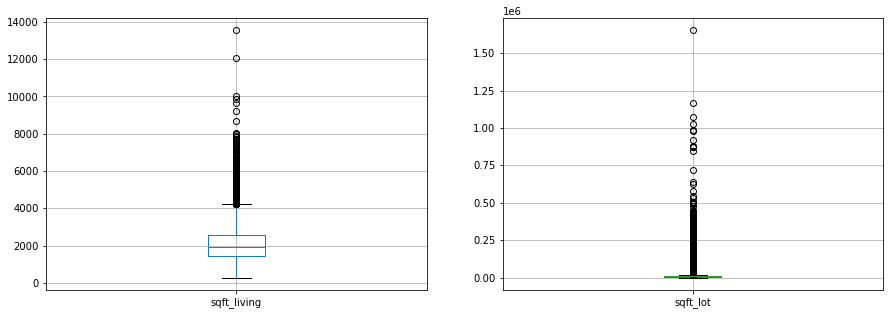

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
data[['sqft_living']].boxplot(ax=ax[0])
data[['sqft_lot']].boxplot(ax=ax[1])
plt.show()

There are several outlier values for "sqft_living", so let's check the top of those outlier observations.

In [23]:
data.iloc[np.where(data['sqft_living']>8000)[0],2:-6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
1164,5110800,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767
3914,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500
4411,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289
7252,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298
8092,4668000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570
9254,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305
12777,2280000,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675
14556,2888000,5,6.25,8670,64033,2.0,0,4,3,13,6120,2550,1965,2003,98177,47.7295
18302,3300000,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,98006,47.5675


High square foot living is associated with a high number of bedrooms and bathrooms, with high grade, respective high price. Thus, observations with a high number of bedrooms cannot be considered as outlier values.

Now, let's see the outliers for the "sqft_lot".

In [24]:
data.iloc[np.where(data['sqft_lot']>750000)[0],2:-6]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat
1719,700000,4,1.00,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313
3949,998000,4,3.25,3770,982998,2.0,0,0,3,10,3770,0,1992,0,98058,47.4140
4441,790000,2,3.00,2560,982278,1.0,0,0,3,8,2560,0,2004,0,98014,47.6955
4540,550000,3,2.00,3650,843309,2.0,0,0,4,7,3650,0,1991,0,98070,47.3627
6691,1998000,2,2.50,3900,920423,2.0,0,0,3,12,3900,0,2009,0,98065,47.5371
7077,1650000,4,3.25,3920,881654,3.0,0,3,3,11,3920,0,2002,0,98024,47.5385
7647,542500,5,3.25,3010,1074218,1.5,0,0,5,8,2010,1000,1931,0,98027,47.4564
7769,855000,4,3.50,4030,1024068,2.0,0,0,3,10,4030,0,2006,0,98045,47.4619
9714,937500,4,4.00,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014,47.6760
17319,190000,2,1.00,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014,47.6888


As can be observed, most of the observations with very high "sqft_lot" also have high value for "sqft_living" and price.

#### Square feet above  and Square feet basement

By definition, the sum of these two variables shall be equal to the square foot of the house. Thus, only one of these variables shall be included in the model.

In [25]:
df=pd.DataFrame(data[['sqft_above','sqft_basement']].sum(axis=1),columns=['sqft_sum'])
print("Difference between sqft_living and sum of sqft_basement and sqft_above is",(data['sqft_living']-df['sqft_sum']).sum())

Difference between sqft_living and sum of sqft_basement and sqft_above is 0


Let's keep only the sqft_above as people are more interested in the area above the ground when buying a house.

#### Floor number

Let's see how many unique values are and what are their distribution.

[1.  1.5 2.  2.5 3.  3.5]


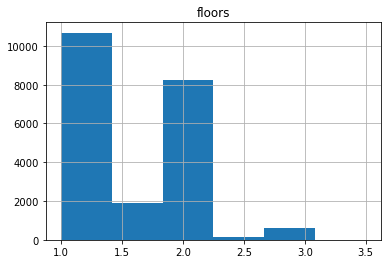

In [26]:
print(np.sort(data['floors'].unique()))
data.hist(column=['floors'],bins=data['floors'].nunique())
plt.show()

#### Zip code

Although zip code seems to be a numerical variable, it should be considered a nominal one. Let's check how many unique values it has.

In [27]:
pd.DataFrame(np.vstack(np.unique(np.array(data['zipcode']),return_counts=True)).T,columns=['zipcode','count'])

,zipcode,count
0,98001,362
1,98002,199
2,98003,280
3,98004,317
4,98005,168
...,...,...
65,98177,255
66,98178,262
67,98188,136
68,98198,280


That means, with the one-hot encoding, that would result in 70 dummy variables.

Let's create the correlation matrix for the numerical variables.

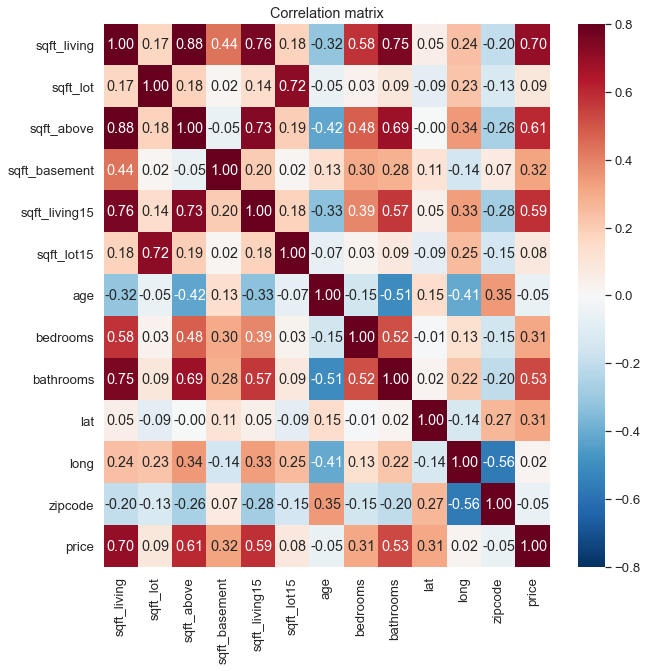

In [28]:
numvar_list=['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','age',\
                  'bedrooms','bathrooms','lat','long','zipcode']
corrvarlist=(numvar_list.copy())
corrvarlist.append('price')

corr_matrix=data[corrvarlist].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.2)
hm=sns.heatmap(data=corr_matrix, vmin=-0.8,vmax=+0.8,fmt='1.2f',annot=True,cmap="RdBu_r")
hm.set_xticklabels(hm.get_yticklabels(), rotation = 90)
plt.title('Correlation matrix')
plt.show()

We may observe that there is a correlation with price for
- sqft_living
- sqft_above
- sqft_basement
- sqft_living15
- bedrooms
- bathrooms
- lat

However, there is a high correlation between the following predictors:
- sqft_living and sqft_above
- sqft_living and sqft_basement
- sqft_living and sqft_living15
- sqft_lot and sqft_lot15
- sqft_above and sqft_living15

Next, let's create a scatter plot matrix with the estimated regression line using all continuous variables.

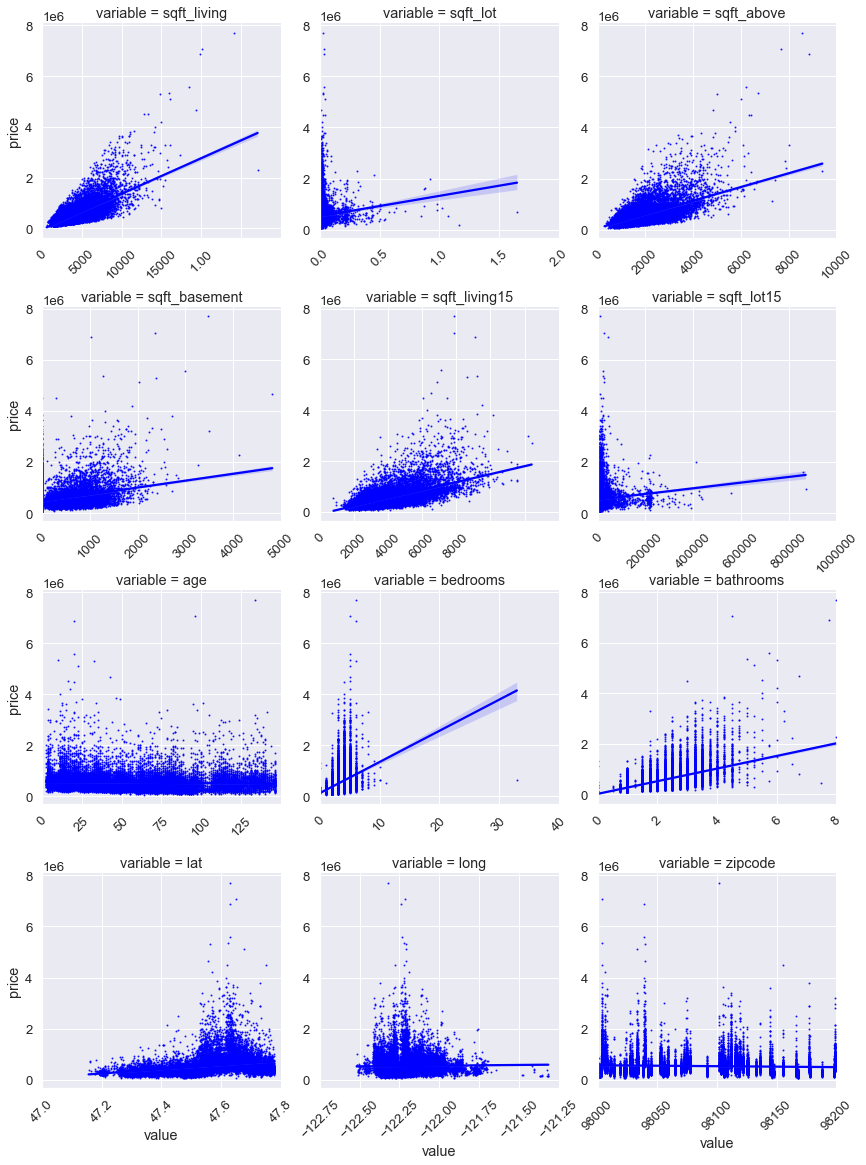

In [29]:
con_2 = pd.melt(data, id_vars='price', value_vars=data[numvar_list])
g = sns.FacetGrid(data=con_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'price', color='blue',scatter_kws={'s':1})
g.set_xticklabels(rotation=45)
plt.show()

The scatter plot matrix provides the same information as the correlation matrix regarding the correlation between the target and predictors.

## 3. Fitting a multiple linear regression model <a name="FitMLR"></a>

Let's fit a multiple linear regression model using all the predictors, except the "sqft_basement" to avoid multicollinearity issues with infinite VIF values, with *statsmodels* library.

In [30]:
numvar_list=['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15','age','bedrooms','bathrooms',\
             'lat','long','zipcode']
formula='price ~ ' + ' + '.join(numvar_list) +' + ' + ' + '.join(catvar_list)
model_ols = ols(formula = formula, data=data).fit()
print(model_ols.summary(title="OLS Regression Results (all predictors)"))
print("RMSE =",np.sqrt(model_ols.mse_resid))

                   OLS Regression Results (all predictors)                    
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2967.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:21:20   Log-Likelihood:            -2.9459e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.978e+05   2.84e+06      0.210

According to the t-statistics, all predictors have regression coefficients significantly different from zero. The F-statistics also shows that our model is better than taking the mean of the target. The Durbin-Watson statistic is close to two, indicating that no first-order autocorrelation is present in the error term. 

There is one problem, though, the condition number is extremely high. Let's check the VIF values.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=np.array(data[numvar_list+catvar_list])
N,D=X.shape
Xdot=np.insert(X,0,np.ones(N),axis=1)
pd.DataFrame(data=np.array([variance_inflation_factor(Xdot,i) for i in range(1,len(numvar_list+catvar_list)+1)]).reshape(-1,1),\
             columns=['VIF'],index=numvar_list+catvar_list)

,VIF
sqft_living,7.846560
sqft_lot,2.101740
sqft_above,5.595346
sqft_living15,2.943365
sqft_lot15,2.133255
age,2.315398
bedrooms,1.650991
bathrooms,3.124011
lat,1.172530
long,1.812407


And indeed, the VIF values for "sqft_living" and "sqft_above" are above five. Let's remove "sqft_above" and leave only "sqft_living" when fitting a linear model.

In [32]:
numvar_shortlist=numvar_list.copy()
numvar_shortlist.remove('sqft_above')
formula='price ~ ' + ' + '.join(numvar_shortlist) +' + ' + ' + '.join(catvar_list)

model_ols = ols(formula = formula, data=data).fit()
print(model_ols.summary())
print("RMSE =",np.sqrt(model_ols.mse_resid))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3136.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:21:20   Log-Likelihood:            -2.9463e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.558e+06   2.84e+06      0.901

The condition number decreased, but is still very high. Let's check again the VIF values.

In [33]:
X=np.array(data[numvar_shortlist+catvar_list])
N,D=X.shape
Xdot=np.insert(X,0,np.ones(N),axis=1)
pd.DataFrame(data=np.array([variance_inflation_factor(Xdot,i) \
                            for i in range(1,len(numvar_shortlist+catvar_list)+1)]).reshape(-1,1),\
                             columns=['VIF'],index=numvar_shortlist+catvar_list)

,VIF
sqft_living,5.016484
sqft_lot,2.100537
sqft_living15,2.910231
sqft_lot15,2.133251
age,2.295284
bedrooms,1.650072
bathrooms,3.117472
lat,1.163254
long,1.770631
zipcode,1.647079


The VIF value for sqft_living is still above 5, which indicates some multicollinearity problem. But this is a predictor with a high correlation with the target. Thus, we should remove those input variables that are highly correlated with this predictor, respective those predictors that are not correlated with the target. The only exception is the "age", which still should affect the price based on common sense.

In [34]:
numvar_shortlist=numvar_list.copy()
numvar_shortlist.remove('sqft_above')
numvar_shortlist.remove('sqft_living15')
numvar_shortlist.remove('sqft_lot15')
numvar_shortlist.remove('sqft_lot')
numvar_shortlist.remove('zipcode')
numvar_shortlist.remove('long')
catvar_shortlist=catvar_list.copy()
catvar_shortlist.remove('condition')
catvar_shortlist.remove('renovated')
catvar_shortlist.remove('spring_summer')

formula='price ~ ' + ' + '.join(numvar_shortlist) +' + ' + ' + '.join(catvar_shortlist)

model_ols = ols(formula = formula, data=data).fit()
print(model_ols.summary(title="OLS Regression Results (reduced number of predictors)"))
print("RMSE =",np.sqrt(model_ols.mse_resid))

            OLS Regression Results (reduced number of predictors)             
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     6013.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:21:21   Log-Likelihood:            -2.9495e+05
No. Observations:               21613   AIC:                         5.899e+05
Df Residuals:                   21604   BIC:                         5.900e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.705e+07   4.93e+05    -54.859      

The condition number decreased a lot but remains high. Let's check the VIF values again.

In [35]:
X=np.array(data[numvar_shortlist+catvar_shortlist])
N,D=X.shape
Xdot=np.insert(X,0,np.ones(N),axis=1)
pd.DataFrame(data=np.array([variance_inflation_factor(Xdot,i) for i in range(1,len(numvar_shortlist+catvar_shortlist)+1)])\
             .reshape(-1,1),columns=['VIF'],index=numvar_shortlist+catvar_shortlist)

,VIF
sqft_living,4.047265
age,1.623414
bedrooms,1.625015
bathrooms,2.993196
lat,1.079738
view,1.342083
grade,2.909069
waterfront,1.196102


The VIF values are all below 5, so no multicollinearity issue is present. To get rid of the ill-conditioning problem, let's standardize the data (only numerical input variables will be standardized).

In [36]:
data[numvar_shortlist]=(data[numvar_shortlist]-data[numvar_shortlist].mean())/data[numvar_shortlist].std()
model_ols = ols(formula = formula, data=data).fit()
print(model_ols.summary(title="OLS Regression Results (reduced number of standardized predictors)"))
print("RMSE =",np.sqrt(model_ols.mse_resid))

      OLS Regression Results (reduced number of standardized predictors)      
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     6013.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:21:21   Log-Likelihood:            -2.9495e+05
No. Observations:               21613   AIC:                         5.899e+05
Df Residuals:                   21604   BIC:                         5.900e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.034e+05   1.55e+04    -19.613      

And yes, now the condition number is indeed very low. The t-statistic shows that all regression coefficients are statistically significantly different from zero. Compared to the model using all predictors, the R-squared and RMSE did not change significantly.

**Note:** *When creating Monte Carlo simulations for this data, it is important to analyze the consequences of the sampling error and not the consequences of the multicollinearity or ill-conditioning.*

The Durbin-Watson statistic is close to two showing no first-order autocorrelation. Alternatively, you may use the Breusch-Godfrey test for testing higher-order autocorrelation.

In [37]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
print(acorr_breusch_godfrey(model_ols,nlags=40))

(47.92079168276357, 0.18232770859893493, 1.1979598380609804, 0.18267913208956704)


Both the chi-square and F-test are not significant, showing no autocorrelation up to lag 40.

## 4. Bias and variance vs. model complexity <a name="BiasVariance"></a>

Let's play the game again, as we did in the simple linear regression case (see Ch2 Ex. 2.7 Sampling error), and assume that the dataset contains the data for the whole population. Here, population represents all the houses of a town (i.e., in this virtual town, there would be 21613 houses in total), and if all of them were sold in one year, the dataset would contain the selling price of all the houses. 

Now, let's check the relation between the sqft living of the house and its price. For the sake of the visualization, we will use a polynomial regression model to show how the bias and variance of a model change as the model complexity increases. In the case of polynomial regression, the model complexity represents the order of the polynomial. 

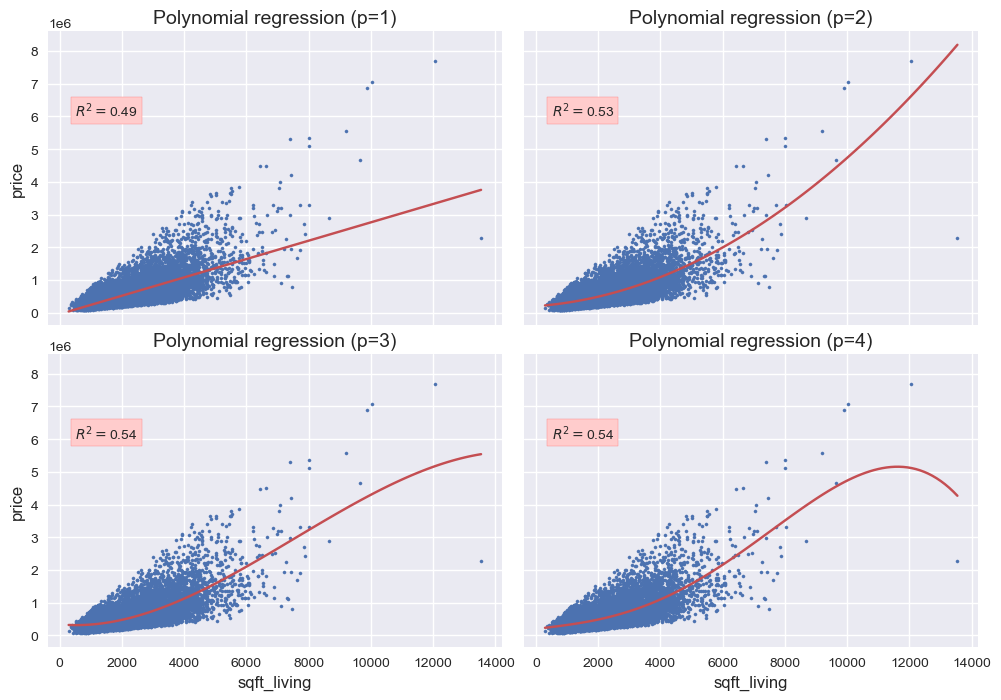

In [38]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl

mpl.style.use('default')
mpl.style.use('seaborn')

# Reload the dataset to have the original data
data = pd.read_csv('data\HouseSalesKingCounty.csv')
linregr=LinearRegression()
fig, ax = plt.subplots(2, 2, figsize=(12, 8),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.1,wspace=0.05)

x_=np.array(data['sqft_living'])[:,np.newaxis]
y_=np.array(data['price'])[:,np.newaxis]

for p in range(1,5):
    Xp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(x_)
    linregr.fit(Xp,y_)
    ax[(p-1)//2,(p-1)%2].scatter(x_,y_,s=5)
    xx=np.linspace(x_.min(),x_.max(),100)[:,np.newaxis]
    XXp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(xx)
    ax[(p-1)//2,(p-1)%2].plot(xx,linregr.predict(XXp),'r')
    ax[(p-1)//2,(p-1)%2].set_title('Polynomial regression (p='+str(p)+')',fontsize=14)
    ax[(p-1)//2,(p-1)%2].text(500,0.6e7,'$R^2=$'+'%1.2f'%(linregr.score(Xp,y_)),bbox=dict(boxstyle="square",\
                   ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8), ))
ax[1,0].set_xlabel('sqft_living',fontsize=12)
ax[1,1].set_xlabel('sqft_living',fontsize=12)
ax[0,0].set_ylabel('price',fontsize=12)
ax[1,0].set_ylabel('price',fontsize=12)
plt.show()

Using the polynomial regression, the polynomial order of 3 seems to be the best fit as the R-squared value does not increase significantly for polynomial order 4. Moreover, the shape of the curve for fourth-order polynomial does not make common sense (the price declines sharply above 12000 sqft). For the same reason, we do not accept polynomial regression with p=2 (an exponential increase of price does not seem to be practically feasible either).

Thus, for the sake of the game - without losing the generalization of the conclusions - we assume that in the population (all the houses of the virtual town), the polynomial regression of order 3 describes the best the relation between sqft living and price.

Of course, in reality, not all the houses of a town are sold within one year, only a small part of it. So a real estate trader, which created a dataset from the houses sold in the last year would contain only a small fraction of all the existing houses within that town (let's say only 500 - that represents more than 2% of the total number of houses, which seems realistic).  

To understand the estimation variation due to sampling, let's create 10000 random samples, each with 500 observations from the 'population', and see the effect of model complexity on bias and variance. 

In [39]:
s_size=500   # sample size
s_nr=10000   # number of samples
# Select randomly 500 members from the population to create a sample and make this 10000 times
np.random.seed(42) # This line can be removed for random sample generation (set only to reproduce the grapchics in the Ebook)
Samples=np.random.choice(Np, (s_size,s_nr))

Run the Monte Carlo simulation and plot the result.

Progress:

IntProgress(value=0, max=400)

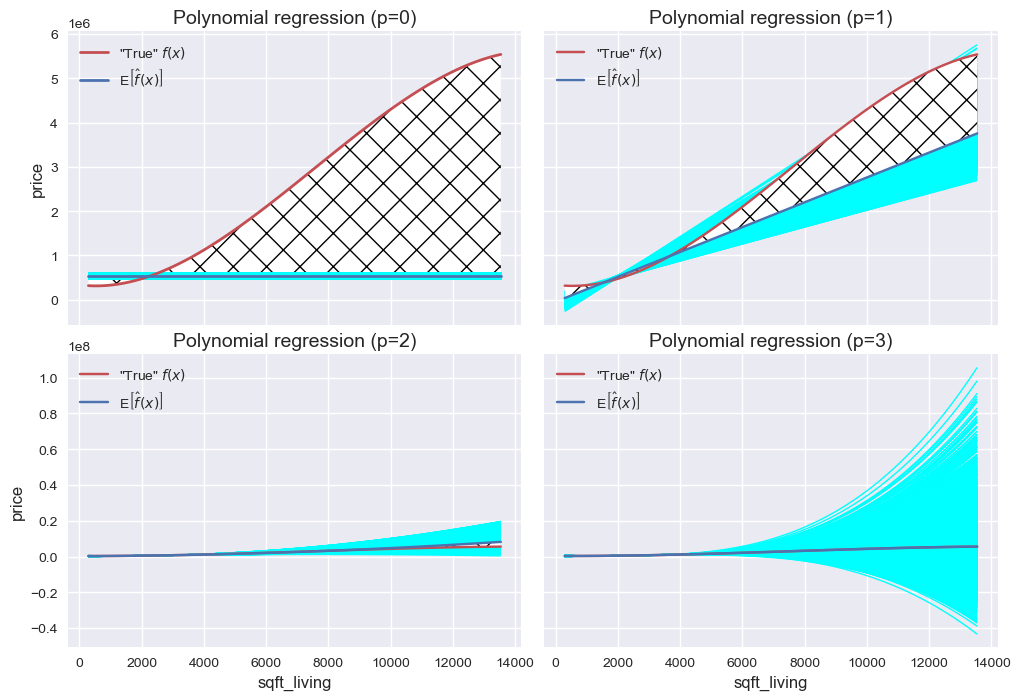

In [40]:
from matplotlib.collections import LineCollection
from ipywidgets import IntProgress
from IPython.display import display

print("Progress:", end="")
f = IntProgress(min=0, max=400) # instantiate the bar
display(f) # display the bar

xminmax=np.array([[x_.min()],[x_.max()]])
Y=np.squeeze(y_[Samples]).mean()
X=PolynomialFeatures(degree=3,include_bias=False).fit_transform(x_)
linregr.fit(X,y_)
xx=np.linspace(xminmax[0,0],xminmax[1,0],100)[:,np.newaxis]
XX3=PolynomialFeatures(degree=3,include_bias=False).fit_transform(xx)

# Create 2x2 scatter of axis
fig, ax = plt.subplots(2, 2, sharex=True,sharey='row',figsize=(12, 8))
fig.subplots_adjust(hspace=0.1,wspace = 0.05)
# Create plot for p=0
lines=[]
for i in range(s_nr):
    ymean=y_[Samples[:,i]].mean()
    lines.append(np.hstack([xminmax,np.array([[ymean],[ymean]])]))
    if 100*i % s_nr == 0:
        f.value+=1
line_coll = LineCollection(lines, colors='cyan',linewidths=1)
ax[0,0].add_collection(line_coll)
ax[0,0].plot(xx,linregr.predict(XX3),'r',linewidth=2,label='"True" $f(x)$')
ax[0,0].plot(xminmax,[Y.mean(),Y.mean()],'b',linewidth=2,label=r'E$\left[\hat f(x)\right]$')
ax[0,0].fill_between(xx.ravel(), np.repeat(Y.mean(),100), linregr.predict(XX3).ravel(), \
                 facecolor='white',hatch='X')
ax[0,0].set_title('Polynomial regression (p=0)',fontsize=14)
ax[0,0].legend(loc='upper left')
# Create plot for p=1,2,3
for p in range(1,4):
    Xp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(x_)
    XXp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(xx)
    lines=[]
    for i in range(s_nr):
        lr=LinearRegression().fit(Xp[Samples[:,i]],y_[Samples[:,i]])
        lines.append(np.hstack([xx,lr.predict(XXp)]))
        if 100*i % s_nr == 0:
            f.value+=1
    line_coll = LineCollection(lines, colors='cyan',linewidths=1)
    ax[p//2,abs(p-2)].add_collection(line_coll)
    ax[p//2,abs(p-2)].plot(xx,linregr.predict(XX3),'r',label='"True" $f(x)$')
    lr.fit(Xp,y_)
    ax[p//2,abs(p-2)].plot(xx,lr.predict(XXp),'b',label=r'E$\left[\hat f(x)\right]$')
    ax[p//2,abs(p-2)].fill_between(xx.ravel(), lr.predict(XXp).ravel(), linregr.predict(XX3).ravel(),\
                     facecolor='white',hatch='X',zorder=2)
    ax[p//2,abs(p-2)].set_title('Polynomial regression (p='+str(p)+')',fontsize=14)
    ax[p//2,abs(p-2)].legend(loc='upper left')
ax[1,0].set_xlabel('sqft_living',fontsize=12)
ax[1,1].set_xlabel('sqft_living',fontsize=12)
ax[0,0].set_ylabel('price',fontsize=12)
ax[1,0].set_ylabel('price',fontsize=12)
plt.show()

From the above plots, we can already conclude that as our model get's more complex, the variance increases, and the bias decreases (the latter becoming zero in this case). That is more obvious if we calculate the bias and variance of each polynomial order (see the Ebook about the calculation of bias and variance).

Let's calculate the bias and variance and make the plot vs. model complexity (again, model complexity is represented by the polynomial order).

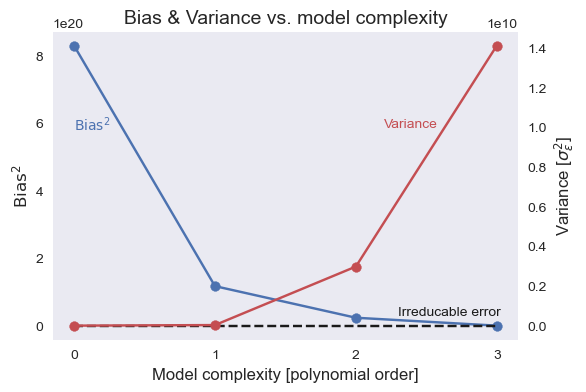

In [41]:
from scipy import integrate
from sklearn.covariance import EmpiricalCovariance
import matplotlib as mpl
mpl.style.use('seaborn')

Bias2,Var=[],[]
Y=y_[Samples].squeeze()
X=PolynomialFeatures(degree=3,include_bias=False).fit_transform(x_)
linregr.fit(X,y_)

# Calculating bias for p=0
func0 = lambda x: linregr.intercept_[0]+linregr.coef_[0][0]*x+linregr.coef_[0][1]*x**2+\
                linregr.coef_[0][2]*x**3-Y.mean()
Bias2.append(pow(integrate.quad(func0,xminmax[0,0],xminmax[1,0])[0],2))

# Calculating bias for p=1
Xp=PolynomialFeatures(degree=1,include_bias=False).fit_transform(x_)
lr=LinearRegression().fit(Xp,y_)
func1 = lambda x: linregr.intercept_[0]+linregr.coef_[0][0]*x+linregr.coef_[0][1]*x**2+\
            linregr.coef_[0][2]*x**3-(lr.intercept_[0]+lr.coef_[0][0]*x)
Bias2.append(pow(integrate.quad(func1,xminmax[0,0],xminmax[1,0])[0],2))

# Calculating bias for p=2
Xp=PolynomialFeatures(degree=2,include_bias=False).fit_transform(x_)
lr=LinearRegression().fit(Xp,y_)
func2 = lambda x: linregr.intercept_[0]+linregr.coef_[0][0]*x+linregr.coef_[0][1]*x**2+\
            linregr.coef_[0][2]*x**3-(lr.intercept_[0]+lr.coef_[0][0]*x+lr.coef_[0][1]*x**2)
Bias2.append(pow(integrate.quad(func2,xminmax[0,0],xminmax[1,0])[0],2))

# Calculating bias for p=3
Xp=PolynomialFeatures(degree=3,include_bias=False).fit_transform(x_)
lr=LinearRegression().fit(Xp,y_)
func3 = lambda x: linregr.intercept_[0]+linregr.coef_[0][0]*x+linregr.coef_[0][1]*x**2+\
            linregr.coef_[0][2]*x**3-(lr.intercept_[0]+lr.coef_[0][0]*x+lr.coef_[0][1]*x**2+\
                                     lr.coef_[0][2]*x**3)
Bias2.append(pow(integrate.quad(func3,xminmax[0,0],xminmax[1,0])[0],2))

# Calculating variances for p=0
Var.append(Y.mean(axis=0).sum()/Np)
# and for p=1,2,3
for p in range(1,4):
    Xp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(x_)
    lr=LinearRegression().fit(Xp,y_)
    r_=y_-lr.predict(Xp)
    sigma2=float(r_.T@r_/(Np-p-1))
    cov_mle=EmpiricalCovariance(assume_centered=False).fit(Xp)
    Var.append(sigma2*(1/Np+cov_mle.mahalanobis(Xp)**2/(Np-1)).sum()/Np)

# Calculating the variance of the error based on the 'true' regression function (polynomial degree 3)
r=y_-linregr.predict(X)
err=float(1/(Np-4)*r.T@r)
Err=[err,err,err,err]

# Make the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.grid(b=None)
plt.xticks([0,1,2,3],['0','1','2','3'])
ax.plot(Bias2,'b')
ax.scatter([0,1,2,3],Bias2,c='b')
ax.set_xlabel('Model complexity [polynomial order]',fontsize=12)
ax.set_ylabel(r'$\mathrm{Bias}^2$',fontsize=12)
ax.text(0.0,5.8e20,'$\mathrm{Bias}^2$',color='b')
ax.text(2.3,0.3e20,'Irreducable error',color='k')
ax.plot(Err,'k--')
ax.plot()
ax2=ax.twinx()
plt.grid(b=None)
ax2.plot(Var,'r')
ax2.scatter([0,1,2,3],Var,c='r')
ax2.set_ylabel('Variance [$\sigma_\epsilon^2$]',fontsize=12)
ax2.text(2.2,1e10,'Variance',color='r')
plt.title("Bias & Variance vs. model complexity",fontsize=14)
plt.show()

Thus, we can conclude that as the model complexity increases (in this case, we increase the number of polynomial features), the bias of the model decreases while the variance of the model increases.

### Training error vs. testing error

Now, let's see how the training error and testing error relates to the model complexity. Let's run another Monte Carlo simulation and split each random sample into a training and testing set. Fit a polynomial regression model (p=0,1,2,3,4,5) on the training data, then calculate the RMSE value on both the training and testing set.

In [42]:
from sklearn.model_selection import train_test_split
# Splitting the 10000 random samples randomly into train set and test set (1000 obs. for training and 100 for testing)
X=x_[Samples].squeeze()
Y=y_[Samples].squeeze()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print("Progress:", end="")
f = IntProgress(min=0, max=600) # instantiate the bar
display(f) # display the bar

# Storing the mean and standard values of the 10000 training and testing errors for each polynomial regression
TrainErrAvg=[]
TestErrAvg=[]

# Calculating the training and testing error for p=0 (constant model as the mean of output)
TrainErr=[]
TestErr=[]
for i in range(s_nr):
    r_train_=np.array(y_train[:,i][:,np.newaxis]-y_train[:,i][:,np.newaxis].mean(axis=0,keepdims=True))
    r_test_=np.array(y_test[:,i][:,np.newaxis]-y_train[:,i][:,np.newaxis].mean(axis=0,keepdims=True))
    N_train,_=r_train_.shape
    N_test,_=r_test_.shape
    rmse_train=float(np.sqrt(r_train_.T@r_train_/(N_train-1)))
    rmse_test=float(np.sqrt(r_test_.T@r_test_/(N_test-1)))
    TrainErr.append(rmse_train)
    TestErr.append(rmse_test)
    if 100*i % s_nr == 0:
        f.value+=1
TrainErrAvg.append(np.array(TrainErr).mean())
TestErrAvg.append(np.array(TestErr).mean())
    
# Calculating the training and testing error for p>0 (polynomial features)
lr=LinearRegression()
for p in range(1,6):
    TrainErr, TestErr=[],[]
    for i in range(s_nr):
        Xp=PolynomialFeatures(degree=p,include_bias=False).fit_transform(x_train[:,i][:,np.newaxis])
        Xpt=PolynomialFeatures(degree=p,include_bias=False).fit_transform(x_test[:,i][:,np.newaxis])
        N_train,D_train=Xp.shape
        N_test,D_test=Xpt.shape
        lr.fit(Xp,y_train[:,i][:,np.newaxis])
        r_train_=y_train[:,i][:,np.newaxis]-lr.predict(Xp)
        r_test_=y_test[:,i][:,np.newaxis]-lr.predict(Xpt)
        rmse_train=float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1)))
        rmse_test=float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1)))
        TrainErr.append(rmse_train)
        TestErr.append(rmse_test)
        if 100*i % s_nr == 0:
            f.value+=1
    TrainErrAvg.append(np.array(TrainErr).mean())
    TestErrAvg.append(np.array(TestErr).mean())

Progress:

IntProgress(value=0, max=600)

Finally, create the plot of these values as a function of polynomial order (model complexity).

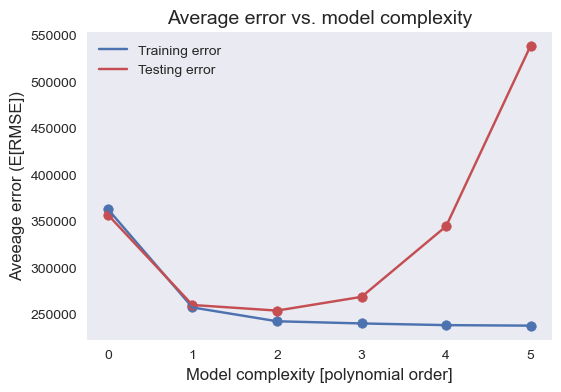

In [43]:
#Create the plot
param_range=np.arange(0,6,1)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.grid(b=None)
plt.scatter([0,1,2,3,4,5],TrainErrAvg,c='b')
plt.plot(TrainErrAvg,'b',label="Training error")
plt.scatter([0,1,2,3,4,5],TestErrAvg,c='r')
plt.plot(TestErrAvg,'r',label="Testing error")
plt.title('Average error vs. model complexity',fontsize=14)
plt.xlabel('Model complexity [polynomial order]',fontsize=12)
plt.ylabel('Aveeage error (E[RMSE])',fontsize=12)
#plt.ylim(0,1800000)
plt.legend()
plt.show()

From the shape of the curves, we can conclude:
- Training error starts at a high value and as the model complexity increases, decreases (eventually close to zero, or even zero)
- Testing error starts at a high value (called underfit) and, as the model complexity increases, drops to a minimum (optimal fit); after that starts increasing again as the model complexity further increases.

From the above error curves, it seems that the optimal model complexity is for polynomial degree p=1,2.

## 5. Estimating generalization error with test error <a name="GenError"></a>

In this section, we will run again Monte Carlo simulations using 10000 random samples, each with 500 observations. 
First, we check the distribution of the training and testing error to see the main drawback of the hold-out method. We may repeat that simulation but using a different test set ratio to understand why in literature the test set ratio is advised to be between 20-30%. Finally, Monte Carlo simulation is also run for other test methods, like repeated hold-out, K-fold, and repeated K-fold, and compare the results.
- hold-out method
- repeated hold-out (R=4, where R represents the number of repetitions
- K-fold with K=4
- repeated K-fold with R=2 and K=2 (thus, for a single random sample, the average of four training and testing errors will be calculated, just as in the other two cases)

We may also run Monte Carlo simulation using only a small sample for
- leave-one-out and
- leave-p-out validation method

Because the dataset was reloaded, let's recreate the "age" variable.

**Note:** *These Monte Carlo simulations require more processing power from the CPU and run for several minutes. A progress bar is shown for each simulation.*

In [44]:
data['age']=2017-data['yr_built']
shortlist=['sqft_living','age','waterfront','view','grade','bedrooms','bathrooms','lat']
X_full=np.array(data[shortlist])
y_full=np.array(data['price'])

Let's create the 10000 random samples from the "population".

In [45]:
sample_size=500   # sample size
nr_samples=10000   # number of samples (if you set to 10000 much longer simulation time is required!)
# Select randomly 500 members from the population to create a sample and make this 10000 times
np.random.seed(42) # This line can be removed for random sample generation (set only to reproduce the grapchics in the Ebook)
Samples=np.random.choice(Np, (sample_size,nr_samples))

#### Hold-out method

Let's start with the hold-out method using a test set ratio of 25%. To increase the simulation speed, we use only the *NumPy* and *scikit-learn* libraries.

In [46]:
print("Progress:", end="")
f = IntProgress(min=0, max=100) # instantiate the bar
display(f) # display the bar

linregr=LinearRegression()

RMSE_train=[]
RMSE_test=[]
i=0
for i in range(nr_samples):
    X_sample=X_full[Samples[:,i]]
    y_sample=y_full[Samples[:,i]]
    # Splitting method is hold-out
    X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample,test_size=0.25, random_state=9)
    N_train,D_train=np.array(X_train).shape
    N_test,D_test=np.array(X_test).shape
    linregr.fit(X_train,y_train)
    r_train_=np.array(y_train-linregr.predict(X_train))[:,np.newaxis]
    r_test_=np.array(y_test-linregr.predict(X_test))[:,np.newaxis]
    RMSE_train.append(float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1))))
    RMSE_test.append(float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1))))
    if 100*i % nr_samples == 0:
        f.value+=1

Progress:

IntProgress(value=0)

Now, let's see the distribution of the training and testing error (RMSE) using the violin plot.

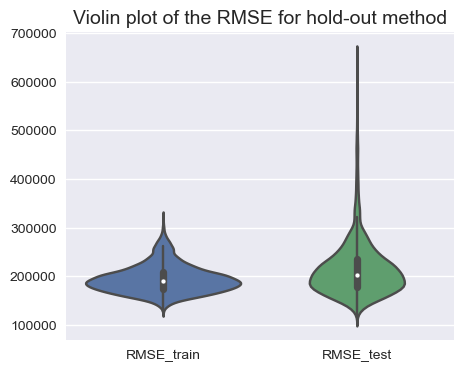

In [47]:
plt.figure(figsize=(5,4))
rmse1=pd.DataFrame(data=np.array([RMSE_train, RMSE_test]).T,columns=['RMSE_train','RMSE_test'])
sns.violinplot(data=rmse1)
plt.title('Violin plot of the RMSE for hold-out method',fontsize=14)
plt.show()

As can be seen, the mean of the training error is lower, while the mean of the testing error is higher than the "true" error obtained on the whole "population" (RMSE=204423). This is a clear indication of why the training set shall not be used for estimating the generalization error. However, the test error distribution shows there is at least one so-called unlucky split when the testing error is lower than the training error. We may print out the minimum of both errors.

In [48]:
rmse1.min()

RMSE_train    127380.445584
RMSE_test     115802.071159
dtype: float64

As can be seen, the minimum of the RMSE_test is lower than the minimum of the RMSE_train, which is a clear indication that there could be such an unlucky split that the testing error is lower than the training error. 

#### Mean and spread of error in Hold-out method as a function of test set ratio

Now, let's see how the mean and spread of these errors vary as we change the proportion of the test set compared to the whole random sample.

In [49]:
print("Progress:", end="")
f = IntProgress(min=0, max=90) # instantiate the bar
display(f) # display the bar

RMSE_train=[]
RMSE_test=[]
for testsize in np.arange(0.1,1,0.1):
    np.random.seed(9)
    for i in range(nr_samples):
        X_sample=X_full[Samples[:,i]]
        y_sample=y_full[Samples[:,i]]
        # Splitting method is hold-out
        X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample,test_size=testsize,random_state=9,shuffle=True)
        N_train,D_train=np.array(X_train).shape
        N_test,D_test=np.array(X_test).shape
        linregr.fit(X_train,y_train)
        r_train_=np.array(y_train-linregr.predict(X_train))[:,np.newaxis]
        r_test_=np.array(y_test-linregr.predict(X_test))[:,np.newaxis]
        RMSE_train.append(float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1))))
        RMSE_test.append(float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1))))
        if 10*i % nr_samples == 0:
            f.value+=1
    f.value+=1
import seaborn as sns
RMSE_data=np.hstack([np.array(RMSE_train),np.array(RMSE_test)])
RMSE_type=np.hstack([np.tile(np.array(['train']),9*nr_samples),np.tile(np.array(['test']),9*nr_samples)])
Test_size=np.ravel(np.tile(100*np.arange(0.1,1,0.1)[:,np.newaxis],nr_samples))
RMSE_testsize=np.tile(Test_size,2)
rmse=pd.DataFrame(data=np.array([RMSE_data, RMSE_type,RMSE_testsize]).T,columns=['RMSE','Type','Testset_ratio [%]'])

Progress:

IntProgress(value=0, max=90)

Let's make a categorical plot with *seaborn* library.

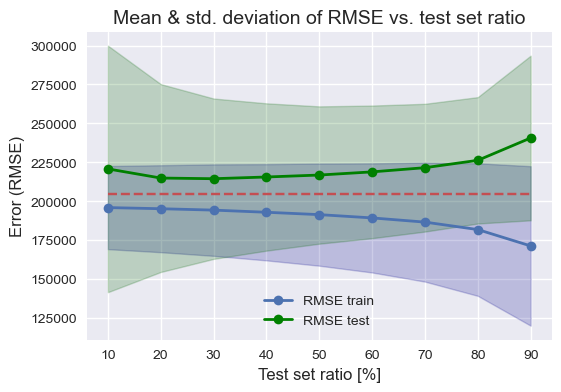

In [50]:
rmse['RMSE']=rmse['RMSE'].astype(float)
rmse_mean=rmse.groupby(['Type','Testset_ratio [%]']).mean()
rmse_std=rmse.groupby(['Type','Testset_ratio [%]']).std()
plt.figure(figsize=(6,4))

param_range=100*np.arange(0.1,1,0.1)
plt.plot(param_range,np.array(rmse_mean)[9:,],'o-',lw=2, label="RMSE train")
plt.fill_between(param_range, np.ravel(np.array(rmse_mean)[9:,] - np.array(rmse_std)[9:,]),
                 np.ravel(np.array(rmse_mean)[9:,] + np.array(rmse_std)[9:,]), alpha=0.2,
                 color="darkblue", lw=1)
plt.plot(param_range,np.array(rmse_mean)[:9,],'o-',lw=2, color='green',label="RMSE test")
plt.fill_between(param_range, np.ravel(np.array(rmse_mean)[:9,] - np.array(rmse_std)[:9,]),
                 np.ravel(np.array(rmse_mean)[:9,] + np.array(rmse_std)[:9,]), alpha=0.2,
                 color="darkgreen", lw=1)
plt.plot([param_range.min(),param_range.max()],[204423,204423],'r--')
plt.title("Mean & std. deviation of RMSE vs. test set ratio",fontsize=14)
plt.xlabel("Test set ratio [%]",fontsize=12)
plt.ylabel("Error (RMSE)",fontsize=12)
plt.legend(loc='lower center')
plt.show()

The figure shows the mean and standard deviation of the training and testing error (RMSE) as a function of the test set ratio (how much part of the current random sample is used for testing). The figure was obtained by calculating training and testing RMSE for the linear model using 10000 random samples from the "population" (each sample containing N=500 observations) and setting different test set ratios. As can be seen, the training error has a high expected error for a low test ratio (i.e., when most of the sample is consumed for training) but low variance. As we decrease the proportion of training set size (i.e., increase the test set ratio), the expected training error steadily decreases while its variance steadily increases.

On the contrary, the testing error initially has a higher value (when the test set ratio is 10% only) with very high variance, and as we increase the test set ratio, a decrease in both expected value and variance can be seen then a steady increase in both mean and variance can be observed. The lowest mean in test error can be seen between 20 and 30%, while the lowest variance in test error can be observed at around 70%.  The red dashed line shows the "true" error of the linear model calculated on the "population".

**Note:** *For a complete explanation check the Ebook.*

#### Repeated hold-out method

Now, let's see the distribution of the repeated hold-out (repetition is set to R=4). So we run again the Monte Carlo simulation using the same 10000 random samples.

In [51]:
from sklearn.model_selection import ShuffleSplit
repeat_holdout=ShuffleSplit(n_splits=4, test_size=.25,random_state=9)

print("Progress:", end="")
f = IntProgress(min=0, max=100) # instantiate the bar
display(f) # display the bar

RMSE_train=[];RMSE_test=[]

for i in range(nr_samples):
    X_sample=X_full[Samples[:,i]]
    y_sample=y_full[Samples[:,i]]
    RMSE_localtrain=[];RMSE_localtest=[]
    for train_idx, test_idx in repeat_holdout.split(X_sample):
        X_train,X_test,y_train,y_test=X_sample[train_idx],X_sample[test_idx],y_sample[train_idx],y_sample[test_idx]
        N_train,D_train=np.array(X_train).shape
        N_test,D_test=np.array(X_test).shape
        linregr.fit(X_train,y_train)
        r_train_=np.array(y_train-linregr.predict(X_train))[:,np.newaxis]
        r_test_=np.array(y_test-linregr.predict(X_test))[:,np.newaxis]
        RMSE_localtrain.append(float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1))))
        RMSE_localtest.append(float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1))))
    RMSE_train.append(np.array(RMSE_localtrain).mean())
    RMSE_test.append(np.array(RMSE_localtest).mean())
    if 100*i % nr_samples == 0:
        f.value+=1

Progress:

IntProgress(value=0)

And plot the distribution of the training and testing error using violin plot with seaborn.

[]

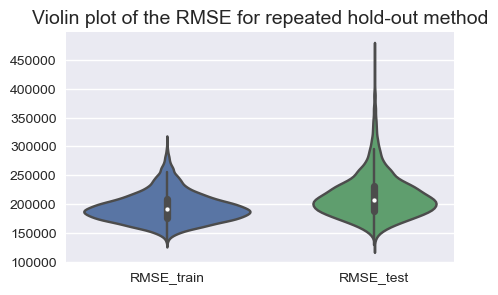

In [52]:
rmse2=pd.DataFrame(data=np.array([RMSE_train, RMSE_test]).T,columns=['RMSE_train','RMSE_test'])
plt.figure(figsize=(5,3))
sns.violinplot(data=rmse2)
plt.title('Violin plot of the RMSE for repeated hold-out method',fontsize=14)
plt.plot()

As before, even with an average of four errors obtained from the hold-out method, we can still observe such unlucky splits that the testing error is lower than the training error. That can be seen more obviously if we print out the minimum of both errors.

In [53]:
rmse2.min()

RMSE_train    134151.045143
RMSE_test     128685.201048
dtype: float64

#### K-Fold validation

The next testing method is the K-fold with K=4. Let's run the Monte Carlo simulations using the same 10000 random samples.

In [54]:
from sklearn.model_selection import KFold
Kfold=KFold(n_splits=4,shuffle=False)

print("Progress:", end="")
f = IntProgress(min=0, max=100) # instantiate the bar
display(f) # display the bar

RMSE_train=[];RMSE_test=[]

for i in range(nr_samples):
    X_sample=X_full[Samples[:,i]]
    y_sample=y_full[Samples[:,i]]
    RMSE_localtrain=[];RMSE_localtest=[]
    for train_idx, test_idx in Kfold.split(X_sample):
        X_train,X_test,y_train,y_test=X_sample[train_idx],X_sample[test_idx],y_sample[train_idx],y_sample[test_idx]
        N_train,D_train=np.array(X_train).shape
        N_test,D_test=np.array(X_test).shape
        linregr.fit(X_train,y_train)
        r_train_=np.array(y_train-linregr.predict(X_train))[:,np.newaxis]
        r_test_=np.array(y_test-linregr.predict(X_test))[:,np.newaxis]
        RMSE_localtrain.append(float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1))))
        RMSE_localtest.append(float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1))))
    RMSE_train.append(np.array(RMSE_localtrain).mean())
    RMSE_test.append(np.array(RMSE_localtest).mean())
    if 100*i % nr_samples == 0:
        f.value+=1

Progress:

IntProgress(value=0)

Then create the violin plot of the training and testing errors.

[]

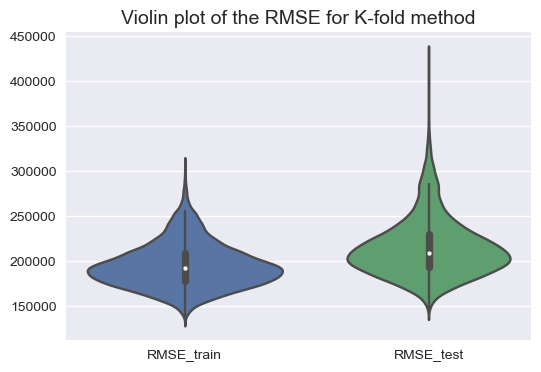

In [55]:
rmse3=pd.DataFrame(data=np.array([RMSE_train, RMSE_test]).T,columns=['RMSE_train','RMSE_test'])
plt.figure(figsize=(6,4))
sns.violinplot(data=rmse3)
plt.title('Violin plot of the RMSE for K-fold method',fontsize=14)
plt.plot()

In this case, the minimum training error is higher than the minimum testing error. However, this does not prove that there could be no such unlucky splits, that this could never happen. 

In [56]:
rmse3.min()

RMSE_train    135510.135734
RMSE_test     145071.351152
dtype: float64

#### Repeated k-fold method

The next testing method is the repeated K-fold with R=2 and K=2 (by this, we have the average of four errors, just like in the other two cases before). Let's run the Monte Carlo simulations using the same 10000 random samples.

In [57]:
from sklearn.model_selection import RepeatedKFold
repeatKfold=RepeatedKFold(n_splits=2,n_repeats=2,random_state=9)

print("Progress:", end="")
f = IntProgress(min=0, max=100) # instantiate the bar
display(f) # display the bar

RMSE_train=[];RMSE_test=[]

for i in range(nr_samples):
    X_sample=X_full[Samples[:,i]]
    y_sample=y_full[Samples[:,i]]
    RMSE_localtrain=[];RMSE_localtest=[]
    for train_idx, test_idx in repeatKfold.split(X_sample):
        X_train,X_test,y_train,y_test=X_sample[train_idx],X_sample[test_idx],y_sample[train_idx],y_sample[test_idx]
        N_train,D_train=np.array(X_train).shape
        N_test,D_test=np.array(X_test).shape
        linregr.fit(X_train,y_train)
        r_train_=np.array(y_train-linregr.predict(X_train))[:,np.newaxis]
        r_test_=np.array(y_test-linregr.predict(X_test))[:,np.newaxis]
        RMSE_localtrain.append(float(np.sqrt(r_train_.T@r_train_/(N_train-D_train-1))))
        RMSE_localtest.append(float(np.sqrt(r_test_.T@r_test_/(N_test-D_test-1))))
    RMSE_train.append(np.array(RMSE_localtrain).mean())
    RMSE_test.append(np.array(RMSE_localtest).mean())
    if 100*i % nr_samples == 0:
        f.value+=1

Progress:

IntProgress(value=0)

Let's make the violin plot of the errors.

[]

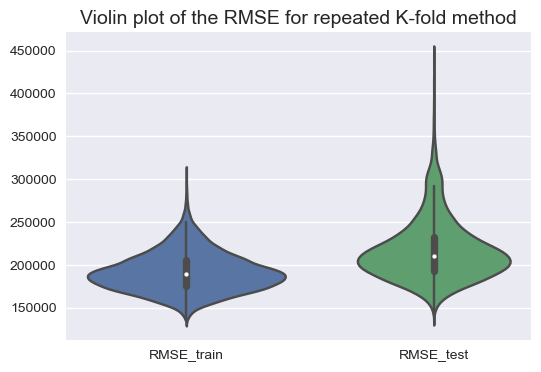

In [58]:
rmse4=pd.DataFrame(data=np.array([RMSE_train, RMSE_test]).T,columns=['RMSE_train','RMSE_test'])
plt.figure(figsize=(6,4))
sns.violinplot(data=rmse4)
plt.title('Violin plot of the RMSE for repeated K-fold method',fontsize=14)
plt.plot()

The same conclusion can be drawn regarding the minimum values of the training and testing error as above.

In [59]:
rmse4.min()

RMSE_train    135810.884219
RMSE_test     140782.286274
dtype: float64

Now, let's create the box plot of all these error distributions on a single plot for comparison using the seaborn library.

[]

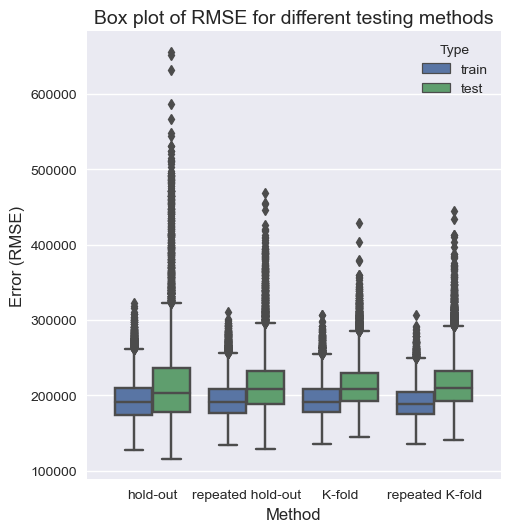

In [60]:
rmse_aggr_lst=[]
for rmse_idx,method in zip([rmse1,rmse2,rmse3,rmse4],['hold-out','repeated hold-out','K-fold','repeated K-fold']):
    RMSE_data=np.hstack([np.array(rmse_idx['RMSE_train']),np.array(rmse_idx['RMSE_test'])])
    RMSE_type=np.hstack([np.tile(np.array(['train']),nr_samples),np.tile(np.array(['test']),nr_samples)])
    rmse_aggr=pd.DataFrame(data=np.hstack([RMSE_data.astype('object')[:,np.newaxis],RMSE_type.astype('object')[:,np.newaxis]])\
                           ,columns=['RMSE','Type'])
    rmse_aggr['Method']=method
    rmse_aggr_lst.append(rmse_aggr)
rmse_aggr=pd.concat([rmse_aggr_lst[0],rmse_aggr_lst[1],rmse_aggr_lst[2],rmse_aggr_lst[3]],ignore_index=True,axis=0)
rmse_aggr

#fig, ax=plt.figure(figsize=(4,4))
mpl.style.use('seaborn')
sns.set_style("darkgrid")
sns.catplot(x='Method',y='RMSE',hue='Type',kind='box',n_boot=0,dodge=True,data=rmse_aggr,legend_out=False)
plt.xlabel('Method',fontsize=12)
plt.ylabel('Error (RMSE)',fontsize=12)
plt.title("Box plot of RMSE for different testing methods",fontsize=14)
plt.plot()

**Note:** *The leave-one-out and leave-p-out methods are not included in this comparison as they require much more time for simulation.*

## 6. Transforming the target variable <a name="TargetTransf"></a>

Earlier, we saw that the target has a distribution skewed to the left. That might result in non-normal residuals, which affects the standard error and the confidence intervals. Let's print out again the OLS results with the *statsmodels* library.

In [61]:
data[numvar_shortlist]=(data[numvar_shortlist]-data[numvar_shortlist].mean())/data[numvar_shortlist].std()
formula='price ~ ' + ' + '.join(numvar_shortlist) +' + ' + ' + '.join(catvar_shortlist)
model_ols = ols(formula = formula, data=data).fit()
print(model_ols.summary(title="OLS Regression Results (linear-linear)"))
print("RMSE =",np.sqrt(model_ols.mse_resid))

                    OLS Regression Results (linear-linear)                    
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     6013.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:27:28   Log-Likelihood:            -2.9495e+05
No. Observations:               21613   AIC:                         5.899e+05
Df Residuals:                   21604   BIC:                         5.900e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.034e+05   1.55e+04    -19.613      

Before moving on, let's print out the PRESS value divided by the total number of observations from the *statsmodels* OLS results.
In the case of linear regression, this is equal to the leave-one-out cross-validation defined in the book.

In [62]:
print("LOOCV (linear-linear) =",model_ols.get_influence().ess_press/N)

LOOCV (linear-linear) = 41931227469.09824


We should take the square root of it to make it comparable with the RMSE value.

In [63]:
np.sqrt(model_ols.get_influence().ess_press/N)

204771.15878242775

Now, let's create the residual plot as a function of the predicted value (which represents the linear combination of inputs).

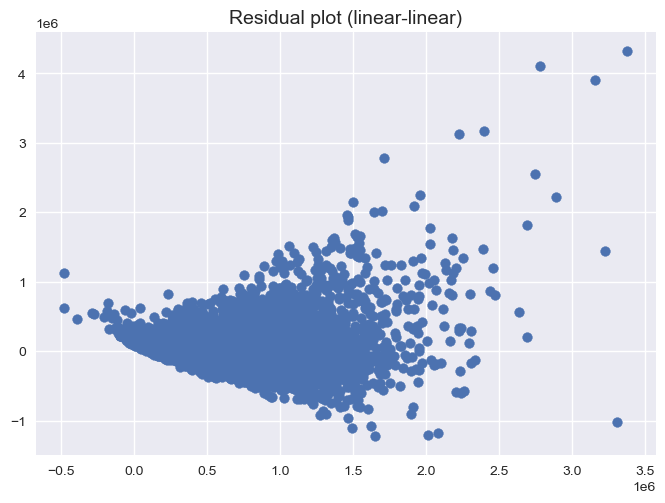

In [64]:
plt.scatter(model_ols.predict(),model_ols.resid)
plt.title("Residual plot (linear-linear)",fontsize=14)
plt.show()

It seems that the residual variance increases with the increasing value of the predicted value. Thus, we have the problem of heteroskedasticity.

Let's use the Goldfeld-Quandt test from the *statsmodels* library to check for homoskedasticity.

In [65]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = het_goldfeldquandt(model_ols.resid, model_ols.model.exog)
print(lzip(name, test))

[('F statistic', 0.9111432955030415), ('p-value', 0.9999993300344043)]


According to the p-value, we can reject the null hypothesis that the lower and upper half of the residuals have the same variance. Thus, we face the problem of heteroskedasticity. Let's try a variance stabilization transformation, like taking the square root of the target.

Let's create the histogram of the square root of the target.

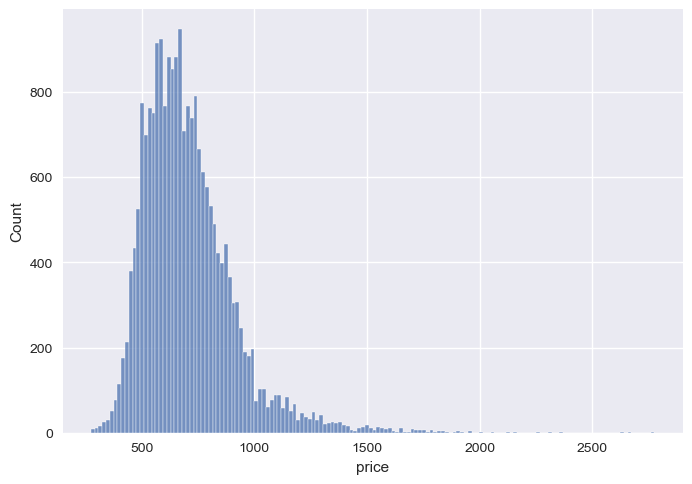

In [66]:
sns.histplot(np.sqrt(data['price']))
plt.show()

And fit the linear model using the transformed target, then print out the result.

In [67]:
formula='np.sqrt(price) ~ ' + ' + '.join(numvar_shortlist) +' + ' + ' + '.join(catvar_shortlist)
pwrmodel_ols = ols(formula = formula, data=data).fit()
print(pwrmodel_ols.summary(title="OLS Regression Results (power-linear)"))
print("RMSE =",np.sqrt(pwrmodel_ols.mse_resid))

                    OLS Regression Results (power-linear)                     
Dep. Variable:         np.sqrt(price)   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     8449.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:27:29   Log-Likelihood:            -1.3019e+05
No. Observations:               21613   AIC:                         2.604e+05
Df Residuals:                   21604   BIC:                         2.605e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     168.2931      7.564     22.249      

We can observe that the R-squared value increased with the transformed target variable. Check again the distribution of the residuals with the scatter plot.

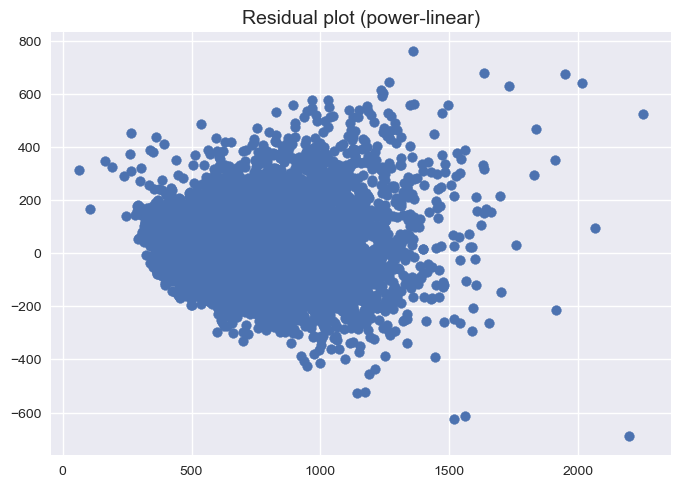

In [68]:
plt.scatter(pwrmodel_ols.predict(),pwrmodel_ols.resid)
plt.title("Residual plot (power-linear)",fontsize=14)
plt.show()

Now, the residual plot shows that the variance of the residuals is around the same for all predicted values.

Let's use the Goldfeld-Quandt test from the statsmodels library to check for homoskedasticity.

In [69]:
name = ['F statistic', 'p-value']
test = het_goldfeldquandt(pwrmodel_ols.resid, pwrmodel_ols.model.exog)
print(lzip(name, test))

[('F statistic', 1.0161923630026763), ('p-value', 0.20199386016016702)]


Although the p-value decreased, still indicates some heteroskedasticity problem. However, that cannot be further solved with a variance stabilization transformation. 

Now, let's create a pipeline with all the transformations, including the target variable. First, we create our transformer that creates the "age" predictor. We may also create the inverse transformer of it and check whether it works as expected.

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin,BaseEstimator

class AgeTransf(BaseEstimator, TransformerMixin):
    def __init__(self,baseyear=2017):
        self.baseyear=baseyear
        return
    def fit(self, X, y = None):
        return self
    def transform(self, x, y = None):
        return self.baseyear-x
    def inverse_transform(self, x, y = None):
        return self.baseyear-x

myAgeTransf=AgeTransf(2017)
ct = ColumnTransformer(transformers=[('agetransf',myAgeTransf,['yr_built'])],remainder='passthrough')
ct.fit_transform(data[['yr_built']])
# check transf and inverse transf by transforming data and the inverse transform and compare with the original data
(myAgeTransf.inverse_transform(ct.fit_transform(data[['yr_built']]))-np.array(data['yr_built'])[:,np.newaxis]).sum()

0

Then we create a pipeline where using the column transformer, we transform
- the "yr_built" input variable into "age" predictor
- standardize the numerical input variables "sqft_living", 'age',"lat", "bedrooms", and "bathrooms"
- leave categorical predictors "waterfront", "view", and "grade" as they are
- drop all other features

We also add a target transformer by providing a transformer function and its inverse.

In [71]:
numeric_features = ['sqft_living', 'yr_built','lat','bedrooms','bathrooms']
yrbuilt_transformer = ColumnTransformer(transformers=[('agetransf',myAgeTransf,['yr_built'])],remainder='passthrough')
numeric_transformer = Pipeline(steps=[
    ('age_transf', yrbuilt_transformer),
    ('scaler', StandardScaler())])
categorical_features = ['waterfront','view','grade']
categorical_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='drop')

regr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

tt = TransformedTargetRegressor(regressor=regr, func=np.sqrt, inverse_func=np.square)

Fit the data using this pipeline (first, without target transformer).

In [72]:
from sklearn import set_config
set_config(display='diagram')

regr.fit(data, data['price'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('age_transf',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('agetransf',
                                                                                                    AgeTransf(),
                                                                                                    ['yr_built'])])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'yr_built',
                                                   'lat', 'bedrooms',
                                                   'bathrooms']),
                                                 ('cat', 'passthrough',
                                                  ['waterfront', 'view',
                                                   'grade'])])),
                ('regressor', LinearRegression())])

And print out the regression coefficients.

In [73]:
print("Intercept =",regr['regressor'].intercept_)
print("Regr. coef. =",regr['regressor'].coef_)

Intercept = -303398.87433788204
Regr. coef. = [ 85829.03929522 158877.9079997   76516.69745639 -30794.72175373
  35324.54299983 596507.28926162  50560.45551017 108026.05655523]


Next, fit the data with the pipeline, but at this time using the target transformer.

In [74]:
tt.fit(data, data['price'])

TransformedTargetRegressor(func=<ufunc 'sqrt'>, inverse_func=<ufunc 'square'>,
                           regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('age_transf',
                                                                                                        ColumnTransformer(remainder='passthrough',
                                                                                                                          transformers=[('agetransf',
                                                                                                                                         AgeTransf(),
                                                                                                                                         ['yr_built'])])),
                                                                                                       ('scaler',
                                                                                                        StandardScaler())]),
                                                                                       ['sqft_living',
                                                                                        'yr_built',
                                                                                        'lat',
                                                                                        'bedrooms',
                                                                                        'bathrooms']),
                                                                                      ('cat',
                                                                                       'passthrough',
                                                                                       ['waterfront',
                                                                                        'view',
                                                                                        'grade'])])),
                                                     ('regressor',
                                                      LinearRegression())]))

We may print out the regression coefficients.

In [75]:
print("Intercept =",tt.regressor_['regressor'].intercept_)
print("Regr. coef. =",tt.regressor_['regressor'].coef_)

Intercept = 168.29310280076288
Regr. coef. = [ 46.47769621  76.55104063  58.43785477 -10.40837621  22.55087221
 228.80235233  27.97956277  69.18239224]


We can predict with just a single line.

In [76]:
tt.predict(data)

array([306686.85825235, 641705.00349356, 350523.69787262, ...,
       244007.4840272 , 402205.71236064, 245447.86632753])

What is really nice with the target transformer, that using the inverse transformer will provide directly the estimated price of the house (and not the square root of it). That means when calculating the RMSE we can compare easily the two models.

So far so good! But after all which model shall be used when delivering the model for real applications?

## 7. Model assesment of the fitted linear model <a name="Validation"></a>

In this final section, we have to choose between the two models, the linear-linear model and the model with the transformed target. Let's call it the power-linear model.

Let's validate both models using different testing methods.

#### Hold-out method

First, we use the simple hold-out method, where 25% of the whole available dataset is used for validating (testing) our model.

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

RMSE=[]
R2=[]

X_train, X_test, y_train, y_test = train_test_split(data,data['price'],test_size=0.25, random_state=8)

print("linear-linear model:")
print("--------------------")
regr.fit(X_train,y_train)
print("R-squared =",regr.score(X_test, y_test))
print("RMSE =",np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))
print()
R2.append(regr.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))

tt.fit(X_train,y_train)
print("power-linear model:")
print("--------------------")
print("R-squared =",tt.score(X_test, y_test))
print("RMSE =",np.sqrt(mean_squared_error(y_test, tt.predict(X_test))))
R2.append(tt.score(X_test, y_test))
RMSE.append(np.sqrt(mean_squared_error(y_test, tt.predict(X_test))))

linear-linear model:
--------------------
R-squared = 0.6962200347480572
RMSE = 207976.80168229857

power-linear model:
--------------------
R-squared = 0.7395604810137995
RMSE = 192570.06343710807


#### Repeated hold-out method

Next, we can use the repeated hold-out method (with repetition R=4).

In [78]:
repeat_holdout=ShuffleSplit(n_splits=4, test_size=.25,random_state=9)
R2_local1=[];RMSE_local1=[]
R2_local2=[];RMSE_local2=[]
for train_idx, test_idx in repeat_holdout.split(data):
    X_train,X_test,y_train,y_test=data.iloc[train_idx],data.iloc[test_idx],data['price'].iloc[train_idx],data['price'][test_idx]
    regr.fit(X_train,y_train)
    R2_local1.append(regr.score(X_test, y_test))
    RMSE_local1.append(np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))
    tt.fit(X_train,y_train)
    R2_local2.append(tt.score(X_test, y_test))
    RMSE_local2.append(np.sqrt(mean_squared_error(y_test, tt.predict(X_test))))
print("linear-linear model:")
print("--------------------")
print("R-squared =",np.array(R2_local1).mean())
print("RMSE =",np.array(RMSE_local1).mean())
print()
print("power-linear model:")
print("--------------------")
print("R-squared =",np.array(R2_local2).mean())
print("RMSE =",np.array(RMSE_local2).mean())

linear-linear model:
--------------------
R-squared = 0.691217776880055
RMSE = 200233.1151890391

power-linear model:
--------------------
R-squared = 0.733164842910317
RMSE = 186129.3979203333


#### K-fold method

As a next step, we can validate the models using the K-fold cross-validation for comparison (with K=4).

In [79]:
Kfold=KFold(n_splits=4,shuffle=False)
R2_local1=[];RMSE_local1=[]
R2_local2=[];RMSE_local2=[]
for train_idx, test_idx in Kfold.split(data):
    X_train,X_test,y_train,y_test=data.iloc[train_idx],data.iloc[test_idx],data['price'].iloc[train_idx],data['price'][test_idx]
    regr.fit(X_train,y_train)
    R2_local1.append(regr.score(X_test, y_test))
    RMSE_local1.append(np.sqrt(mean_squared_error(y_test, regr.predict(X_test))))
    tt.fit(X_train,y_train)
    R2_local2.append(tt.score(X_test, y_test))
    RMSE_local2.append(np.sqrt(mean_squared_error(y_test, tt.predict(X_test))))
print("linear-linear model:")
print("--------------------")
print("R-squared =",np.array(R2_local1).mean())
print("RMSE =",np.array(RMSE_local1).mean())
print()
print("power-linear model:")
print("--------------------")
print("R-squared =",np.array(R2_local2).mean())
print("RMSE =",np.array(RMSE_local2).mean())    

linear-linear model:
--------------------
R-squared = 0.6862076768447101
RMSE = 205490.73722993923

power-linear model:
--------------------
R-squared = 0.7327504897728538
RMSE = 189533.36557956133


Now, instead of using the above code, we may use the "cross_val_score" function from the scikit-learn library. We can provide the estimator and a single scorer to get the result. <br>
First, we create the single scorer for both the RMSE and the R-squared. Then calculate the score values using the pipelines defined earlier (with and without the target transformed).

**Note:** *The RMSE is calculated from the "mean_squared_error" metric, and the scorer will provide a negative value in order to follow the "greater is better" attitude. Thus, RMSE is calculated by taking the square root of the absolute value of the scorer function.*

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

mse_scorer=make_scorer(score_func=mean_squared_error,greater_is_better=False)
r2_scorer=make_scorer(score_func=r2_score,greater_is_better=True)

RMSE_local1=np.sqrt(np.abs(cross_val_score(estimator=regr,X=data,y=data['price'],scoring=mse_scorer,cv=4)))
R2_local1=cross_val_score(estimator=regr,X=data,y=data['price'],scoring=r2_scorer,cv=4)
print("linear-linear model:")
print("--------------------")
print("RMSE from each fold:",RMSE_local1)
print("Mean of RMSE:",RMSE_local1.mean())
print("R2 from each fold:",R2_local1)
print("Mean of R2:",R2_local1.mean())
print()

RMSE_local2=np.sqrt(np.abs(cross_val_score(estimator=tt,X=data,y=data['price'],scoring=mse_scorer,cv=4)))
R2_local2=cross_val_score(estimator=tt,X=data,y=data['price'],scoring=r2_scorer,cv=4)
print("power-linear model:")
print("--------------------")
print("RMSE from each fold:",RMSE_local2)
print("Mean of RMSE:",RMSE_local2.mean())
print("R2 from each fold:",R2_local2)
print("Mean of R2:",R2_local2.mean())

linear-linear model:
--------------------
RMSE from each fold: [213287.99837743 206365.46425913 195791.0231152  206518.463168  ]
Mean of RMSE: 205490.73722993923
R2 from each fold: [0.68294892 0.68193983 0.69320367 0.68673829]
Mean of R2: 0.6862076768447101

power-linear model:
--------------------
RMSE from each fold: [193725.22695441 183610.69049159 186502.47424947 194295.07062277]
Mean of RMSE: 189533.36557956133
R2 from each fold: [0.73844155 0.74821423 0.72162271 0.72272347]
Mean of R2: 0.7327504897728538


We may further make the code compact if we use the "cross_validate" function from the scikit-learn library. In that case, we can provide multiple scorers as a list or as a dictionary. The dictionary is better because the key could represent the scorer's name.

In [81]:
from sklearn.model_selection import cross_validate
cross_validate(estimator=regr,X=data,y=data['price'],scoring={'MSE':mse_scorer,'R2':r2_scorer},cv=4)

{'fit_time': array([0.01695395, 0.01794934, 0.01396465, 0.01496196]),
 'score_time': array([0.00698638, 0.00598359, 0.00598311, 0.00798488]),
 'test_MSE': array([-4.54917703e+10, -4.25867048e+10, -3.83341247e+10, -4.26498756e+10]),
 'test_R2': array([0.68294892, 0.68193983, 0.69320367, 0.68673829])}

As can be seen, the returned value is a dictionary, first providing the time needed to fit, then the validate the model. The last two keys are the score values.

Moreover, we may even provide the cross-validation splitter function, so the repeated hold-out method would look like this.

In [82]:
cross_validate(estimator=regr,X=data,y=data['price'],\
               scoring={'MSE':mse_scorer,'R2':r2_scorer},cv=ShuffleSplit(n_splits=4, test_size=.25,random_state=9))

{'fit_time': array([0.02393603, 0.02692842, 0.02094221, 0.02194262]),
 'score_time': array([0.00797868, 0.00498819, 0.00698137, 0.00498605]),
 'test_MSE': array([-3.86906963e+10, -3.61219990e+10, -4.11581856e+10, -4.46478030e+10]),
 'test_R2': array([0.70938679, 0.68589546, 0.68096055, 0.68862831])}

#### Summary

Now, let's summarize the findings by creating the testing errors for all these validation methods.

In [83]:
repeated_holdout=ShuffleSplit(n_splits=4, test_size=.25,random_state=9)
Kfold=KFold(n_splits=4,shuffle=False)
repeatKfold=RepeatedKFold(n_splits=2,n_repeats=2,random_state=9)
test_methods={'repeated_holdout':repeated_holdout,'Kfold':Kfold,'repeatKfold':repeatKfold}
estimators={"linear-linear":regr, "power-linear": tt}

for key in test_methods:
    print(key)
    print("----------------")
    for est in estimators:
        result=cross_validate\
        (estimator=estimators[est],X=data,y=data['price'],scoring={'MSE':mse_scorer,'R2':r2_scorer},cv=test_methods[key])
        print(est)
        print("\tR2 =",result['test_R2'].mean())
        print("\tRMSE =",np.mean(np.sqrt(np.abs(result['test_MSE']))))
        R2.append(result['test_R2'].mean())
        RMSE.append(np.mean(np.sqrt(np.abs(result['test_MSE']))))
    print()    

repeated_holdout
----------------
linear-linear
	R2 = 0.691217776880055
	RMSE = 200233.1151890391
power-linear
	R2 = 0.733164842910317
	RMSE = 186129.3979203333

Kfold
----------------
linear-linear
	R2 = 0.6862076768447101
	RMSE = 205490.73722993923
power-linear
	R2 = 0.7327504897728538
	RMSE = 189533.36557956133

repeatKfold
----------------
linear-linear
	R2 = 0.6891480608453461
	RMSE = 204590.88362136952
power-linear
	R2 = 0.7356806568637805
	RMSE = 188691.39912993714



We can print out the summary of findings by taking into account the result of the hold-out validation method.

In [84]:
print("Validation results using different test methods:")
print("-----------------------------------------------")
print("linear-linear:")
print("\tRMSE:",RMSE[::2])
print("\tR2-squared:",R2[::2])
print("power-linear:")
print("\tRMSE:",RMSE[1::2])
print("\tR2-squared:",R2[1::2])

Validation results using different test methods:
-----------------------------------------------
linear-linear:
	RMSE: [207976.80168229857, 200233.1151890391, 205490.73722993923, 204590.88362136952]
	R2-squared: [0.6962200347480572, 0.691217776880055, 0.6862076768447101, 0.6891480608453461]
power-linear:
	RMSE: [192570.06343710807, 186129.3979203333, 189533.36557956133, 188691.39912993714]
	R2-squared: [0.7395604810137995, 0.733164842910317, 0.7327504897728538, 0.7356806568637805]


#### Leave-one-out and leave-p-out cross validation

Finally, we may check the test results using the leave-one-out and leave-p-out cross-validation from the scikit-learn library.
However, these require thousands of model fitting, so we take only the first 500 observations.

**Note:** *In this case 500 iterations will be needed for the leave-one-out method and it will return 500 RMSE values and we shall take the mean of them. The R-squared value cannot be defined when there is only one observation in the test set, so we will calculate only the RMSE.*

In [85]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X_drop, X_reduced, y_drop, y_reduced = train_test_split(data,data['price'],test_size=500, random_state=18)

result=cross_validate(estimator=regr,X=X_reduced,y=y_reduced,scoring={'MSE':mse_scorer},cv=loo)
print("RMSE for linear-linear:",np.mean(np.sqrt(-result['test_MSE'])))
result=cross_validate(estimator=tt,X=X_reduced,y=y_reduced,scoring={'MSE':mse_scorer},cv=loo)
print("RMSE for power-linear:",np.mean(np.sqrt(-result['test_MSE'])))

RMSE for linear-linear: 126895.87813948777
RMSE for power-linear: 116348.1401463585


As can be seen, the mean of the RMSE values is much lower than what we get with the other methods. <br>
Now, do the same with leave-p-out cross-validation method. 

**Note:** *It should be understood that even with 500 observations and p=2, the number of combinations is 124750. That is, the required number of iterations is 124750. Thus, the validation will take several 10 minutes to run. For this reason, we will set that all available CPU threads to be used on a normal laptop, and we also set the verbosity level to 1 to see what happens as the code runs. Again, only RMSE will be calculated.*

In [86]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=2)
X_drop, X_reduced, y_drop, y_reduced = train_test_split(data,data['price'],test_size=500, random_state=18)

result=cross_validate(estimator=regr,X=X_reduced,y=y_reduced,scoring={'MSE':mse_scorer},cv=lpo,n_jobs=4,verbose=1)
print("RMSE for linear-linear =",np.mean(np.sqrt(-result['test_MSE'])))
result=cross_validate(estimator=tt,X=X_reduced,y=y_reduced,scoring={'MSE':mse_scorer},cv=lpo,n_jobs=4,verbose=1)
print("RMSE for power-linear:",np.mean(np.sqrt(-result['test_MSE'])))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1204 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 3204 tasks      | elapsed:   19.9s
[Parallel(n_jobs=4)]: Done 6004 tasks      | elapsed:   34.6s
[Parallel(n_jobs=4)]: Done 9604 tasks      | elapsed:   53.5s
[Parallel(n_jobs=4)]: Done 14004 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 19204 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 25204 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 32004 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 39604 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 48004 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 57204 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 67204 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 78004 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 89604 tasks      | ela

RMSE for linear-linear = 144797.9378768845


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   25.4s
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:   39.8s
[Parallel(n_jobs=4)]: Done 3576 tasks      | elapsed:   56.9s
[Parallel(n_jobs=4)]: Done 4876 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 6376 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 8076 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 9976 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 12076 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 14376 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 16876 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 19576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 22476 tasks      | elapsed:  

RMSE for power-linear: 133088.55993069327


With that, we should now understand the model assessment with different testing methods and how to use the scikit-learn library.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).